# Veri Hazırlama

Kütüphaneler

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io

import warnings

warnings.filterwarnings("ignore")


Veri

In [86]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [87]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [88]:
dataset


Veri Ön İşleme

In [89]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [90]:
train_set


In [91]:
test_set


Veri Görselleştirme

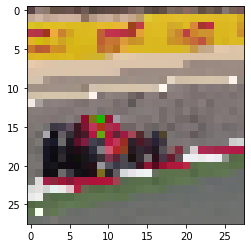

Ferrari
torch.Size([1, 3, 28, 28])


In [92]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [93]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [94]:
import time

start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.1710]
Epoch [1/2, loss:1.4980]
Epoch [1/3, loss:1.4799]
Epoch [1/4, loss:1.4584]
Epoch [1/5, loss:1.5897]
Epoch [1/6, loss:1.1187]
Epoch [1/7, loss:1.5859]
Epoch [1/8, loss:1.4722]
Epoch [1/9, loss:1.4272]
Epoch [1/10, loss:1.4707]
Epoch [1/11, loss:1.5687]
Epoch [1/12, loss:1.4648]
Epoch [1/13, loss:1.4251]
Epoch [1/14, loss:1.5488]
Epoch [1/15, loss:1.1755]
Epoch [1/16, loss:1.4485]
Epoch [1/17, loss:1.5288]
Epoch [1/18, loss:1.5189]
Epoch [1/19, loss:1.4351]
Epoch [1/20, loss:1.2066]
Epoch [1/21, loss:1.2126]
Epoch [1/22, loss:1.2144]
Epoch [1/23, loss:1.4419]
Epoch [1/24, loss:1.4255]
Epoch [1/25, loss:1.4249]
Epoch [1/26, loss:1.4178]
Epoch [1/27, loss:1.2112]
Epoch [1/28, loss:1.4087]
Epoch [1/29, loss:1.4608]
Epoch [1/30, loss:1.4940]
Epoch [1/31, loss:1.4649]
Epoch [1/32, loss:1.2143]
Epoch [1/33, loss:1.4646]
Epoch [1/34, loss:1.4977]
Epoch [1/35, loss:1.2203]
Epoch [1/36, loss:1.4976]
Epoch [1/37, loss:1.4580]
Epoch [1/38, loss:1.2212]
Epoch [1/39, loss:1.4

Modelin Testi

In [95]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [96]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 163 / 200 with accuracy 81.50
test doğruluk:
Got 61 / 79 with accuracy 77.22
